# <center> Decision Tree Classifier with Randomized Search
Decision tree is trained on feature set 1

## <font color='royalblue'>Get the data

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 3.00880939,  0.26443017,  1.05370334, ...
X_32_val                  -> array([[-0.13964146,  0.53184264, -0.71694033, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[-0.1396414
X_32train_std             -> array([[-0.80277066, -0.49489511, -0.83240094, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[-0.006215
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 3.0088093
X_train                   -> array([[[-0.01174874, -0.00817356, -0.0042913 , ..
X_train_std               -> array([[-0.80277066, -0.49489511, -0.83240094, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([3, 5, 1, ..., 2, 4, 0])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 3, ..
y_32_train                -> array([5, 0, 2, ..., 4, 6, 6])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_train_std.shape, "and labels: ", y_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_test_std), X_test_std[18].shape, "arrays for SNR values:")
print(X_test_std.keys())

Training data:  (80000, 16) and labels:  (80000,)
 
Test data:
Total 20 (4000, 16) arrays for SNR values:
dict_keys([0, -16, 2, 4, 6, 8, 12, 10, -20, -14, -18, 16, 18, -12, 14, -10, -8, -6, -4, -2])


## <font color='royalblue'>Train and test the classifier

In [3]:
#Train the classifier

params = {'max_depth': list(range(9,18)),'max_leaf_nodes': list(range(50, 150)), 'min_samples_split': [2,3,4],
          'max_features': [None,'auto','sqrt','log2'], 'criterion':['gini', 'entropy']}

rand_search_cv = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=0)

start = time()
print("Train decision tree classifier - randomized search for parameter optimization")
rand_search_cv.fit(X_train_std, y_train)
print("Randomized search took %.2f minutes "%((time() - start)//60))
print("   ")
print("Result of randomized search:")
print(rand_search_cv.best_estimator_)

Train decision tree classifier - randomized search for parameter optimization
Randomized search took 0.00 minutes 
   
Result of randomized search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
            max_features=None, max_leaf_nodes=132,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')


In [4]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("Test the classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = rand_search_cv.predict(X_test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_test[snr], y_pred[snr])
    print("Decision Tree's accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR value

Test the classifier
 
Decision Tree's accuracy on -20 dB SNR samples =  0.12475
Decision Tree's accuracy on -18 dB SNR samples =  0.12625
Decision Tree's accuracy on -16 dB SNR samples =  0.1295
Decision Tree's accuracy on -14 dB SNR samples =  0.12975
Decision Tree's accuracy on -12 dB SNR samples =  0.147
Decision Tree's accuracy on -10 dB SNR samples =  0.166
Decision Tree's accuracy on -8 dB SNR samples =  0.24925
Decision Tree's accuracy on -6 dB SNR samples =  0.328
Decision Tree's accuracy on -4 dB SNR samples =  0.40975
Decision Tree's accuracy on -2 dB SNR samples =  0.42925
Decision Tree's accuracy on 0 dB SNR samples =  0.48025
Decision Tree's accuracy on 2 dB SNR samples =  0.61775
Decision Tree's accuracy on 4 dB SNR samples =  0.74725
Decision Tree's accuracy on 6 dB SNR samples =  0.79525
Decision Tree's accuracy on 8 dB SNR samples =  0.809
Decision Tree's accuracy on 10 dB SNR samples =  0.821
Decision Tree's accuracy on 12 dB SNR samples =  0.8285
Decision Tree's accu

## <font color='royalblue'> Visualize classifier performance

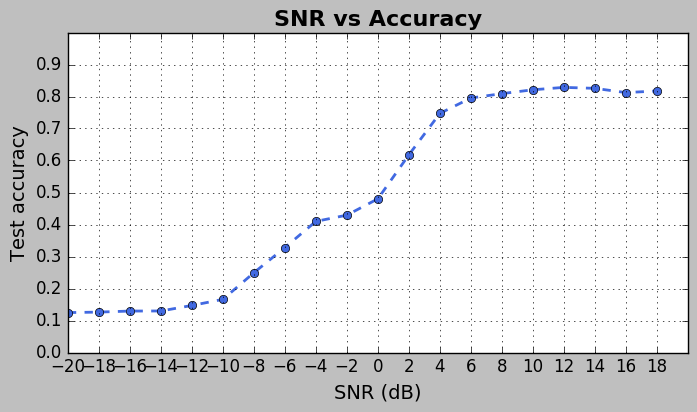

In [5]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

In [4]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import pandas as pd

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
y_predicted = rand_search_cv.predict(X_test_std[18])
conf_matrix = confusion_matrix(y_predicted, y_test[18]) 

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix Without Normalization")
print(df)

Confusion Matrix Without Normalization
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK    436     0      0     0     0     43     35     4
BPSK      1   482      0     0    11      3      6     2
CPFSK    12     0    461    15     0      3      5     0
GFSK     10     1     39   485     1     10     11     3
PAM4      2    13      0     0   485      8      9     3
QAM16     6     0      0     0     0    218    201     4
QAM64     6     0      0     0     0    190    221     3
QPSK     27     4      0     0     3     25     12   481


Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.84  0.00   0.00  0.00  0.00   0.08   0.07  0.01
BPSK   0.00  0.95   0.00  0.00  0.02   0.01   0.01  0.00
CPFSK  0.02  0.00   0.93  0.03  0.00   0.01   0.01  0.00
GFSK   0.02  0.00   0.07  0.87  0.00   0.02   0.02  0.01
PAM4   0.00  0.02   0.00  0.00  0.93   0.02   0.02  0.01
QAM16  0.01  0.00   0.00  0.00  0.00   0.51   0.47  0.01
QAM64  0.01  0.00   0.00  0.00  0.00   0.45   0.53  0.01
QPSK   0.05  0.01   0.00  0.00  0.01   0.05   0.02  0.87


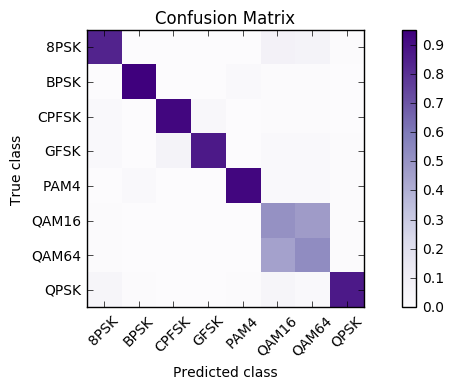

In [5]:
#Normalize the matrix

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

In [6]:
from sklearn.externals import joblib

joblib.dump(rand_search_cv, "decision_tree3.pkl")

['decision_tree3.pkl']

In [2]:
import pickle
from sklearn.externals import joblib
rand_search_cv = joblib.load("decision_tree3.pkl")